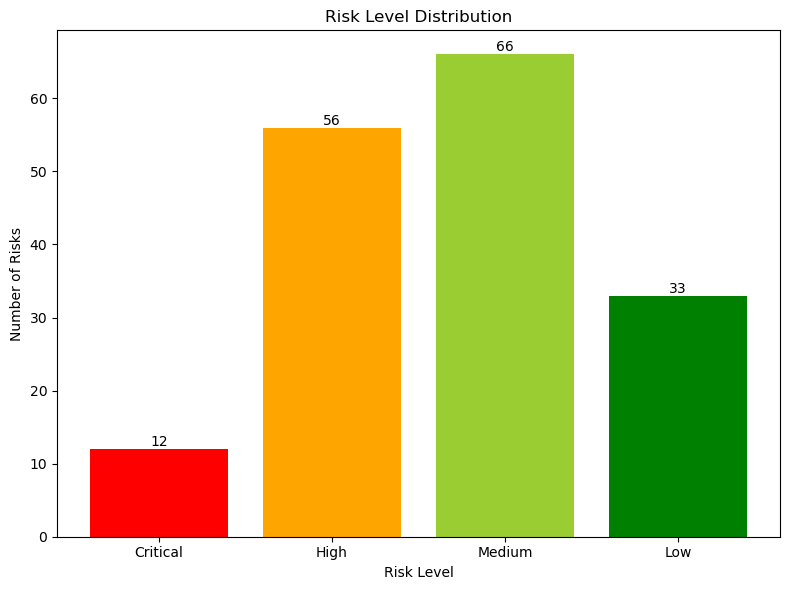

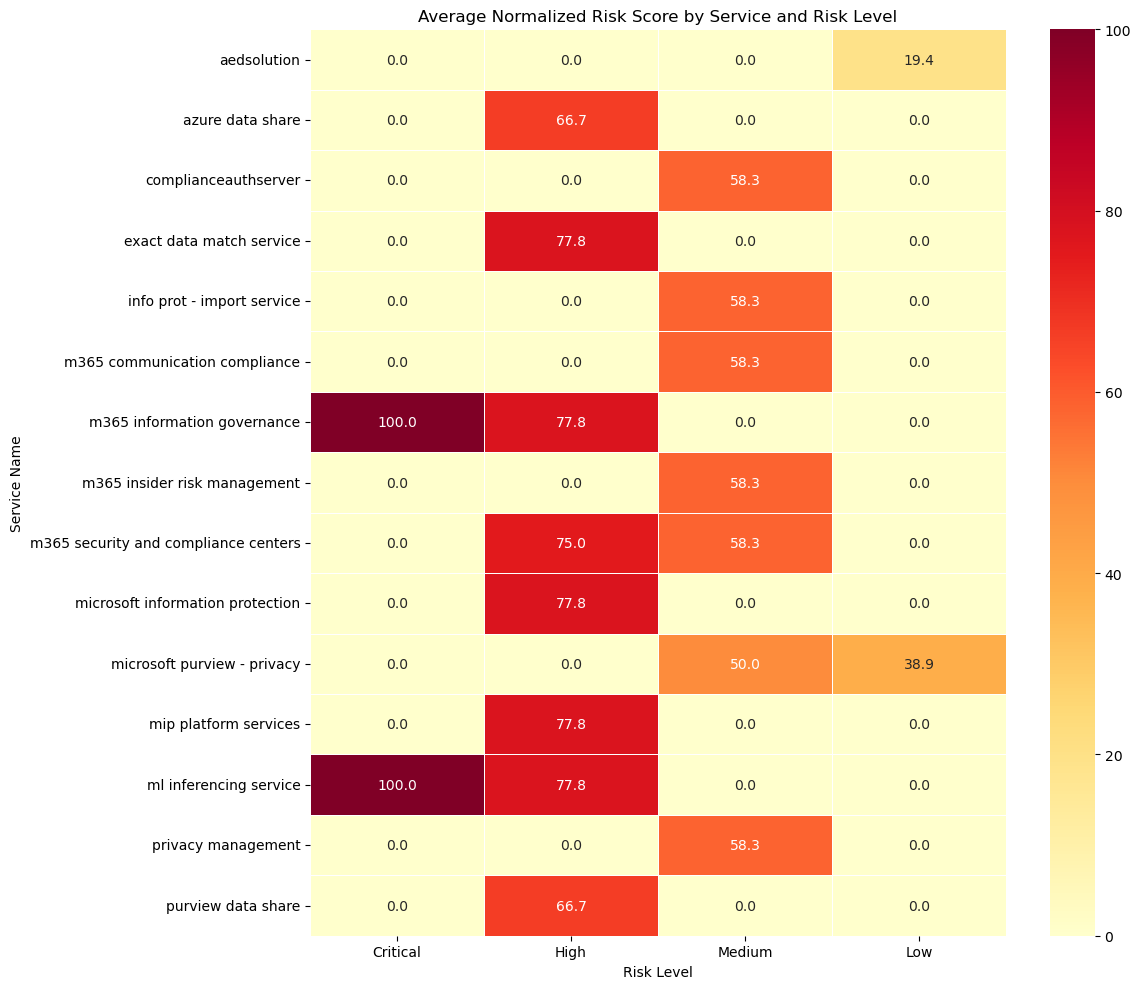

/tmp/ipykernel_459/3549493621.py:70: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


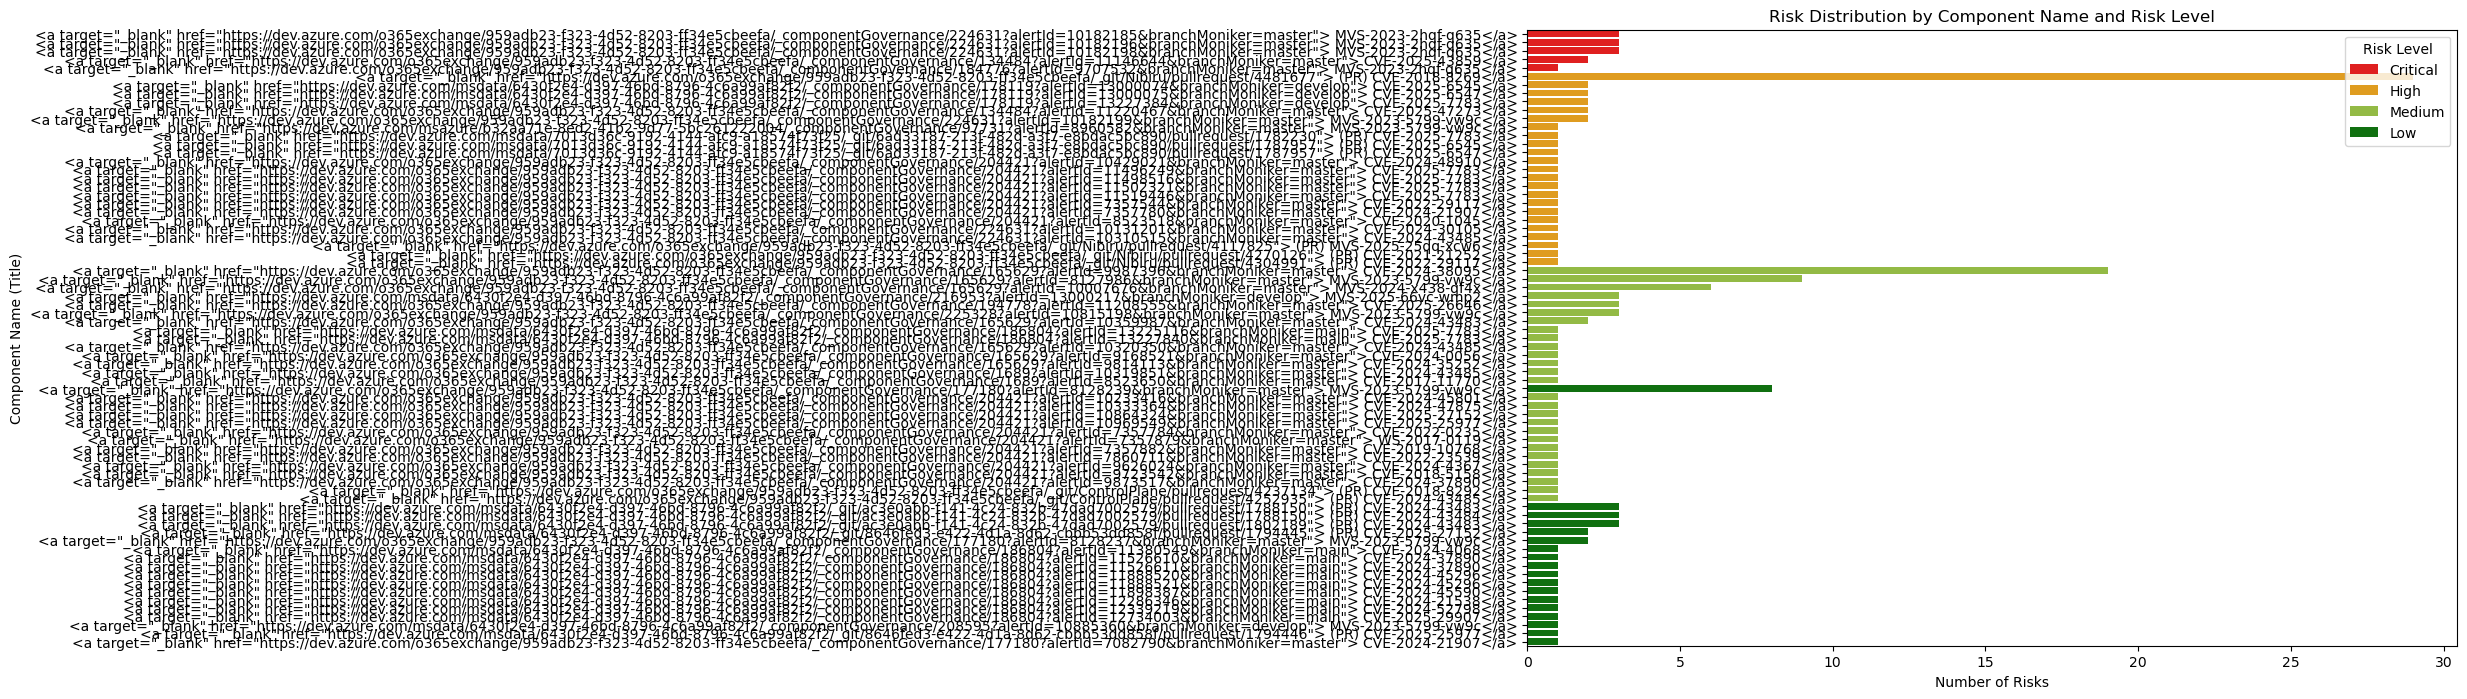

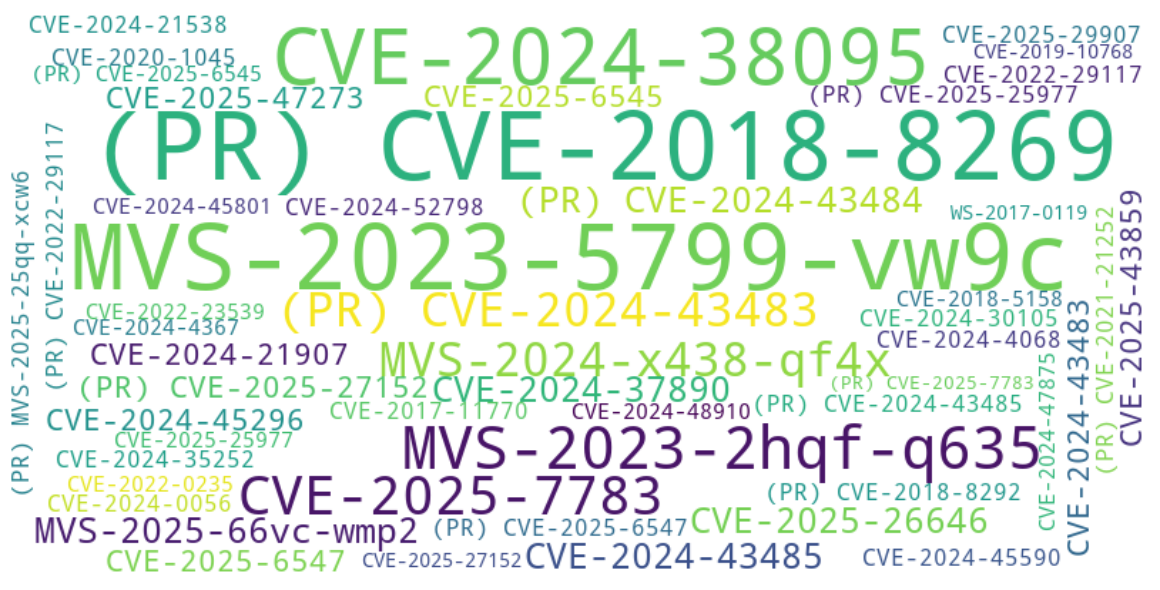

✅ Dashboard metrics and visuals generated!


In [1]:
# Install required package (only needed once, you can remove after installation)
# !pip install wordcloud openpyxl seaborn pandas matplotlib

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load the risk register Excel file
df = pd.read_excel("Risk_Register_1ES_Normalized_Usethis.xlsx", sheet_name="Sheet1", engine="openpyxl")

#df = pd.read_excel(file_path, sheet_name="Sheet1", engine="openpyxl")

# 1. Risk Level Distribution (Bar Chart)
risk_order = ["Critical", "High", "Medium", "Low"]
risk_counts = df["Risk Level"].value_counts().reindex(risk_order).fillna(0)
colors = ["red", "orange", "yellowgreen", "green"]

plt.figure(figsize=(8, 6))
bars = plt.bar(risk_counts.index, risk_counts.values, color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10)
plt.title("Risk Level Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Number of Risks")
plt.tight_layout()
plt.savefig("risk_level_distribution.png")
plt.show()

# 2. Risk Heatmap (Service Name vs Risk Level)
heatmap_data = (
    df.groupby(["Service Name", "Risk Level"])["Normalized Risk Score"]
    .mean().unstack().fillna(0)[risk_order]
)
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5)
plt.title("Average Normalized Risk Score by Service and Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Service Name")
plt.tight_layout()
plt.savefig("risk_heatmap.png")
plt.show()

# 3. Risk Distribution by Component (Title)
component_risk_counts = (
    df.groupby(["Title", "Risk Level"]).size()
    .reset_index(name="Count")
)
component_risk_counts["Risk Level"] = pd.Categorical(
    component_risk_counts["Risk Level"], categories=risk_order, ordered=True
)
component_risk_counts = component_risk_counts.sort_values(
    by=["Risk Level", "Count"], ascending=[True, False]
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=component_risk_counts, x="Count", y="Title",
    hue="Risk Level", dodge=False,
    palette={"Critical": "red", "High": "orange", "Medium": "yellowgreen", "Low": "green"}
)
plt.xlabel("Number of Risks")
plt.ylabel("Component Name (Title)")
plt.title("Risk Distribution by Component Name and Risk Level")
plt.legend(title="Risk Level", loc="upper right")
plt.tight_layout()
plt.savefig("risk_distribution_by_component.png")
plt.show()

# 4. Word Cloud of Components by Risk Frequency
titles = df["Title"].astype(str)
cleaned_titles = titles.str.extract(r'>(.*?)<')[0].fillna(titles)
freq_dict = Counter(cleaned_titles)

wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(freq_dict)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.savefig("risk_wordcloud.png")
plt.show()

# 5. Actionable List: Top 10 Highest Risk Items
actionable_list = (
    df.sort_values(by="Normalized Risk Score", ascending=False)
    .head(10)[["Title", "Service Name", "Normalized Risk Score", "Risk Level"]]
)
actionable_list.to_excel("actionable_risks.xlsx", index=False)

print("✅ Dashboard metrics and visuals generated!")
